# Tutorial 2. Flow Visualization 

### Description: Flow visualization is important when assessing a flow field and is helpful in better understanding the flow characteristics. Streamlines, pathlines and streaklines are introduced in this exercise. The first part deals with defining, setting up and visualizing a vector field. Here it represents a steady flow, more precisely a pure rotational field. In-built streamline plot has also underlying numerical approximation due to which the streamline is instead of a circle (analytical solution) a spiral. Isocontours are used to show the velocity magnitude. Numerical integration methods are implemented to show the differences for pathline calculation. This follows the Lagrangian view, i.e. particle tracking. While the flow domain is defined by a vector field independent of time, i.e. steady, the particles in the flow have a changing velocity as this depends by definition on the position. Some exercises are proposed. 

#### Students are advised to complete the exercises. 

Project: Structural Wind Engineering WS20-21
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek, A. Kodakkal
        
Author: anoop.kodakkal@tum.de mate.pentek@tum.de

Created on:  08.11.2015

Last update: 09.11. 2020

##### Contents:

1. Calculation of divergence and curl 
2. Vector field visualization
3. Streamlines
4. Pathlines with different numerical integration schemes


In [1]:
# import
import time
import matplotlib.pyplot as plt
import numpy as np
import sympy 
from matplotlib import pyplot as plt

#### Symbolic vector calculus

using the symbolic toolbox (sympy) to define and display the velocity field u.

In [2]:
# declare symbolic variables
x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
t = sympy.Symbol('t')

Let us define each component of the velocity field. 

In [3]:
##
## modify here for a different velocity field
## use here the format: symbolic_vel_component = f(t,x,y) = a + b*x + c*y + d*t
##
symbolic_velocity_x = 0 + 0 * x + (-2) * y + 0 * t
symbolic_velocity_y = 0 + 2 * x + 0 * y + 0 * t
symbolic_velocity_z = 0 + 0 * x + 0 * y + 0 * t
print('u = [', symbolic_velocity_x,' ', symbolic_velocity_y,' ', symbolic_velocity_z,']')

# creating function from the symbolic expression
# which are later used for numerical evaluations
velocity_x = sympy.lambdify((t,x,y), symbolic_velocity_x)
velocity_y = sympy.lambdify((t,x,y), symbolic_velocity_y)
velocity_z = sympy.lambdify((t,x,y), symbolic_velocity_z)

u = [ -2*y   2*x   0 ]


###### For exercise 1
Try a different velocity field. Modify in block 3 and not block 4! 

In [4]:
# symbolic_velocity_x = 2
# symbolic_velocity_y = 2
# symbolic_velocity_z = 0
# print('u = [', symbolic_velocity_x,' ', symbolic_velocity_y,' ', symbolic_velocity_z,']')

### Calculation of  divergence and curl


#### Two key operators in vector calculus are divergence and curl. Recall from lecture the definitions of these two quantities. What do these two quantities signify?  

Divergence signifies how a vector field changes its magnitude in the neighborhood of a point and curl is an indicator of how its direction changes.

Divergence of a velocity field $u(x,y,z)$ is

$$ div (u) = \nabla \cdot u =  \frac{\partial u_x}{\partial x} + \frac{\partial u_y}{\partial y} + \frac{\partial u_z}{\partial z}  $$


In [5]:
symbolic_div = sympy.diff(symbolic_velocity_x, x) + sympy.diff(symbolic_velocity_y, y) + sympy.diff(symbolic_velocity_z, z);
print('div(u)= ', symbolic_div)

div(u)=  0


Curl of a velocity field $u(x,y,z)$ is

$$ curl (u) = \nabla \times u =  
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k}  \\ 
\frac{\partial }{\partial x } & \frac{\partial}{\partial y} & \frac{\partial }{\partial z} \\ 
u_x & u_y & u_z
\end{vmatrix} $$


In [6]:
symbolic_curl_x = sympy.diff(symbolic_velocity_z, y) - sympy.diff(symbolic_velocity_y, z)
symbolic_curl_y = sympy.diff(symbolic_velocity_x, z) - sympy.diff(symbolic_velocity_z, x)
symbolic_curl_z = sympy.diff(symbolic_velocity_y, x) - sympy.diff(symbolic_velocity_x, y)
print('curl(u) = [', symbolic_curl_x,' ', symbolic_curl_y,' ', symbolic_curl_z,']')

curl(u) = [ 0   0   4 ]


### Vector (velocity) field  visualization

We need to generate a grid to visualize. 

In [7]:
# give grid size parameters
grid_spacing_start = -2
grid_spacing_end = 2
grid_spacing_size = 0.4

# generate grid size vectors 1D
grid_spacing_x = np.arange(grid_spacing_start, grid_spacing_end + grid_spacing_size, grid_spacing_size) 
grid_spacing_y = np.arange(grid_spacing_start, grid_spacing_end + grid_spacing_size, grid_spacing_size) 

meshgrid_x, meshgrid_y = np.meshgrid(grid_spacing_x, grid_spacing_y)

Refer to [meshgrid](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.meshgrid.html) for more details on mesh grid function on numpy 

##### Let us plot the vector field to visualize 

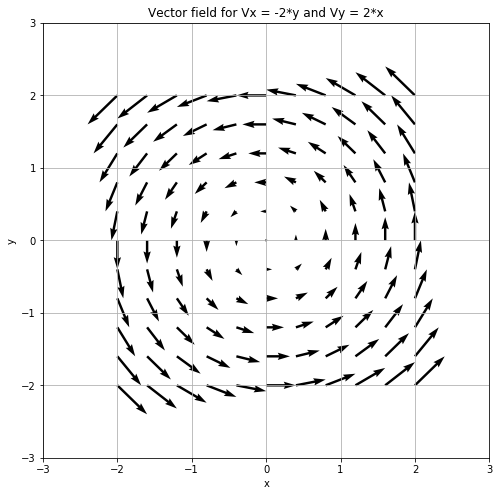

In [8]:
plt.figure(num=1, figsize=(8, 8))
plt.title('Vector field for Vx = ' + str(symbolic_velocity_x) + ' and Vy = ' + str(symbolic_velocity_y))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(grid_spacing_start-1, grid_spacing_end+1)
plt.ylim(grid_spacing_start-1, grid_spacing_end+1)

# 0.0 stands for t=0 -> considering one certain time step
t = 0.0
plt.quiver(meshgrid_x, meshgrid_y,
           velocity_x(t, meshgrid_x, meshgrid_y), velocity_y(t, meshgrid_x, meshgrid_y),
           angles='xy',scale_units='xy',scale=10)

#plt.axis('equal')
plt.grid()

### Exercise 1: Visualizing different fields 

Try to visualize following vector fields and compute their divergence and curl. 
What is the relationship between these quantities and the vector fields? Modify in block 3 and not block 4! 

1. constant u = [ 2, 2, 0 ]
2. constant u = [ 2, -2, 0 ]
3. u = [ x, y, 0 ]
4. u = [ 2y, -2x, 0 ]
5. u = [ x-y, x+y, 0 ]

### Streamline visualization 


using the inbuilt function of [streamplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html) to plot the streamlines 

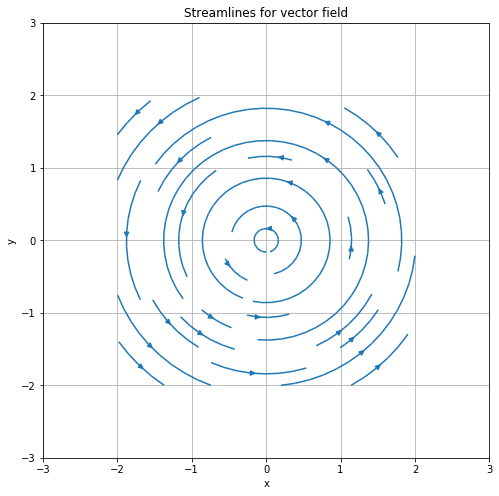

In [9]:
plt.figure(num=2, figsize=(8, 8))

# 0.0 stands for t=0 -> considering one certain time step
t = 0.0
plt.streamplot(meshgrid_x, meshgrid_y,
               velocity_x(t, meshgrid_x, meshgrid_y), velocity_y(t, meshgrid_x, meshgrid_y),
               density= 0.5)

plt.title('Streamlines for vector field')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([grid_spacing_start-1, grid_spacing_end+1])
plt.ylim([grid_spacing_start-1, grid_spacing_end+1])
plt.grid(True)

### Contour plot for velocity magnitude


Velocity magnitude $ \mid U\mid= \sqrt{U_x^2 + U_y^2}$

* for the easiness of visualisation a 2D flow field in X and Y are considered here after 

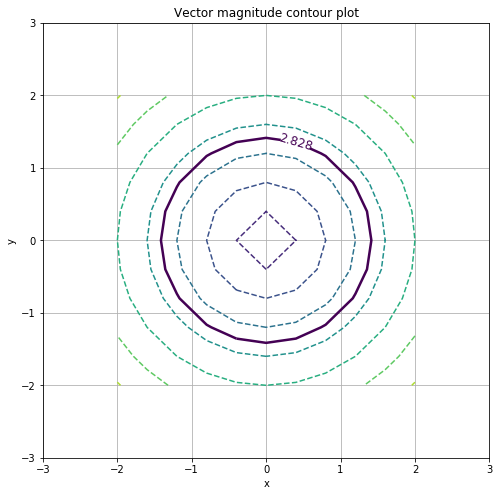

In [10]:
# 0.0 stands for t=0 -> considering one certain time step
t = 0.0
meshgrid_velocity_magnitude = np.sqrt((np.square(velocity_x(t, meshgrid_x, meshgrid_y)) + 
                                       np.square(velocity_y(t, meshgrid_x, meshgrid_y))))

# plot separately a contour line for the magnitude of velocity for an initial point
# x0 = 1, y0 = 1 -> looking for magnitude Ux(x0=1)= -2 and Uy(y0=1) = 2
# magnitude is 2*sqrt(2) = 2.8284
value_looked_for = np.sqrt((-2*1)**2 + (2*1)**2)

# plot first plot line of interest 
# after plot contours lines dashed 
plt.figure(num=3, figsize=(8, 8))
# plot a selected countour line
CS = plt.contour(meshgrid_x, meshgrid_y, meshgrid_velocity_magnitude, levels = [value_looked_for], linewidths= 2.5)
plt.clabel(CS, inline=1, fontsize=12)
# plot multiple countour lines
plt.contour(meshgrid_x, meshgrid_y, meshgrid_velocity_magnitude, linestyles='dashed',linewidths=1.5)

plt.title('Vector magnitude contour plot')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([grid_spacing_start-1, grid_spacing_end+1])
plt.ylim([grid_spacing_start-1, grid_spacing_end+1])
plt.grid(True)

## Check Point 1: Discussion

#### Discuss in groups the insights into vector (velocity) field visualization and other flow related quantities. Can you make some predictions of the flow fields from the the divergence and curl?  

### Pathline 

Pathlines are actual paths traveled by each particle.  
$$ x = x_{start} + \int_{t_{start}} ^{t}{u dt }$$

###### Here, the particle is introduced into flow at time $ t = 0$ at position $x(t=0) = 1 $ and $ y(t=0) = 1$

We follow this particle in time and evaluate the pathline. The determination of the pathline for this case is done numerically. This implies an approximation of position (distance) by numerically integrating the given (known) velocity.
$$ U_x = \frac {dx} {dt} \rightarrow dx = U_x dt$$

This can be solved using various (time) integration schemes.

##### 1. A forward Euler integration 


check out the (forward) [Euler integration](https://en.wikipedia.org/wiki/Euler_method) for details 

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [11]:
# start time
start_time = 0.0
# end time
end_time = np.pi
#delta time
delta_time = 0.1   
# time step
n_steps = round((end_time - start_time)/delta_time)
# time series
time_series = np.linspace(start_time, end_time, n_steps)

end_time is chosen as $\pi$ so that the particle will come back to its initial position. Recall the fact the pathlines and streamlines are same for a steady flow. 

The pathline is evaluated using the forward Euler scheme. The pathline length, x and y coordinates are stored for each time step. 

In [12]:
# defining the velocity as a function
# one can define with the lambda placeholder for variables
# velocities defined generically as functions depending on x, y, t 
# so positions x and y (maybe z) and time t
# sympy.lambdify creates a function from the symbolic definition of 
# symbolic_velocity_component with the variables x, y, t which can be 
# evaluated numerically

# initialize with zero values
coord_x = np.zeros(len(time_series))
coord_y = np.zeros(len(time_series))
# initial position
coord_x[0] = 1   
coord_y[0] = 1

# length set to zero
pathline_length = 0

# calculation loop for forward Euler
# x(i) = x(i-1) + Vx(i-1) * delta_t
# y(i) = y(i-1) + Vy(i-1) * delta_t
for i in range(0, len(time_series)-1):
    # calculate new position
    coord_x[i+1] = coord_x[i] + velocity_x(time_series[i] + delta_time, 
                                           coord_x[i], 
                                           coord_y[i]) * delta_time
    coord_y[i+1] = coord_y[i] + velocity_y(time_series[i] + delta_time, 
                                           coord_x[i], 
                                           coord_y[i]) * delta_time 
    
    # increment pathline length
    pathline_length += np.sqrt((coord_x[i+1] - coord_x[i])**2 + (coord_y[i+1] - coord_y[i])**2) 

# store results under new name to be more specific
euler_coord_x = coord_x
euler_coord_y = coord_y
euler_pathline_length = pathline_length 

##### 2. 4th order Runga-Kutta (RK-4) integration 


check out the [ Runga-Kutta (RK-4)](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Examples) for details 

In [13]:
# initialize with zero values
coord_x = np.zeros(len(time_series))
coord_y = np.zeros(len(time_series))
# initial position
coord_x[0] = 1   
coord_y[0] = 1

# length set to zero
pathline_length = 0

# calculation loop for RK4
for i in range(0, len(time_series)-1):
    # calculate new position
    k_1 = velocity_x(time_series[i],
                    coord_x[i],
                    coord_y[i])
    k_2 = velocity_x(time_series[i] + 0.5 * delta_time,
                    coord_x[i] + 0.5 * delta_time * k_1,
                    coord_y[i] + 0.5 * delta_time * k_1)
    k_3 = velocity_x(time_series[i] + 0.5 * delta_time,
                    coord_x[i] + 0.5 * delta_time * k_2,
                    coord_y[i] + 0.5 * delta_time * k_2)
    k_4 = velocity_x(time_series[i] + delta_time,
                    coord_x[i] + k_3 * delta_time,
                    coord_y[i] + k_3 * delta_time)
     
    coord_x[i+1] = coord_x[i] + (1.0/6.0) * (k_1 + 2 * k_2 + 2 * k_3 + k_4) * delta_time  
     
    k_1 = velocity_y(time_series[i], 
                     coord_x[i], 
                     coord_y[i])
    k_2 = velocity_y(time_series[i] + 0.5 * delta_time, 
                     coord_x[i] + 0.5 * delta_time * k_1, 
                     coord_y[i] + 0.5 * delta_time * k_1)
    k_3 = velocity_y(time_series[i] + 0.5 * delta_time,
                     coord_x[i] + 0.5 * delta_time * k_2, 
                     coord_y[i] + 0.5 * delta_time * k_2)
    k_4 = velocity_y(time_series[i] + delta_time,
                     coord_x[i] + k_3 * delta_time,
                     coord_y[i] + k_3 * delta_time)
    
    coord_y[i+1] = coord_y[i] + (1.0/6.0) * (k_1 + 2 * k_2 + 2 * k_3 + k_4) * delta_time  
    
    # increment pathline length
    pathline_length += np.sqrt((coord_x[i+1] - coord_x[i])**2 + (coord_y[i+1] - coord_y[i])**2) 

# store results under new name to be more specific
rk4_coord_x = coord_x
rk4_coord_y = coord_y
rk4_pathline_length = pathline_length

##### 3. Adams-Bashforth


check out the [ Adams-Bashforth](https://en.wikipedia.org/wiki/Linear_multistep_method#Two-step_Adams%E2%80%93Bashforth) for details 

In [14]:
# initialize with zero values
coord_x = np.zeros(len(time_series))
coord_y = np.zeros(len(time_series))
# initial position
coord_x[0] = 1   
coord_y[0] = 1

# length set to zero
pathline_length = 0

# predict first step with Euler as Adams-Bashforth needs more information to
# start because the method depends on 2 previous values (positions) of x
# and y
# note that it introduces an inital error, one could substitute it with RK4
# to predict instead and reduce the error
coord_x[1] = coord_x[0] + velocity_x(time_series[0] + delta_time,
                                    coord_x[0],
                                    coord_y[0]) * delta_time
coord_y[1] = coord_y[0] + velocity_y(time_series[0] + delta_time,
                                    coord_x[0],
                                    coord_y[0]) * delta_time

pathline_length += (np.sqrt((coord_x[1] - coord_x[0])**2 + (coord_y[1] - coord_y[0])**2)) 

# calculation loop for Adams-Bashforth
for i in range(0 + 1, len(time_series)-1):   
    # calculate new position
    coord_x[i+1] = coord_x[i] + 3.0/2.0 * velocity_x(time_series[i] + delta_time,
                                                    coord_x[i],
                                                    coord_y[i]) * delta_time \
                              - 1.0/2.0 * velocity_x(time_series[i-1] + delta_time,
                                                    coord_x[i-1],
                                                    coord_y[i-1]) * delta_time
    coord_y[i+1] = coord_y[i] + 3.0/2.0 * velocity_y(time_series[i] + delta_time,
                                                    coord_x[i],
                                                    coord_y[i]) * delta_time \
                              - 1.0/2.0 * velocity_y(time_series[i-1] + delta_time,
                                                    coord_x[i-1],
                                                    coord_y[i-1]) * delta_time

    # increment pathline length
    pathline_length += np.sqrt((coord_x[i+1] - coord_x[i])**2 + (coord_y[i+1] - coord_y[i])**2)

# store results under new name to be more specific
ab_coord_x = coord_x
ab_coord_y = coord_y
ab_pathline_length = pathline_length

##### 4. Analytic solution

The (exact) analytic value for particles (for this specific case) is a circle as the corresponding pathline/streamline are the same (for a steady flow field).

In [15]:
# radius
r = np.sqrt((1)**2 + (1)**2)
# parametric time steps
# taking a center angle theta
theta = np.linspace(0, 2*np.pi, 1000)
# center of circle a,b
a = 0
b = 0
# point on the circle
coord_x = r * np.cos(theta) + a
coord_y = r * np.sin(theta) + b

# store results under new name to be more specific
exact_coord_x = coord_x
exact_coord_y = coord_y
exact_pathline_length = 2 * np.pi * r

##### Let us plot the pathline 

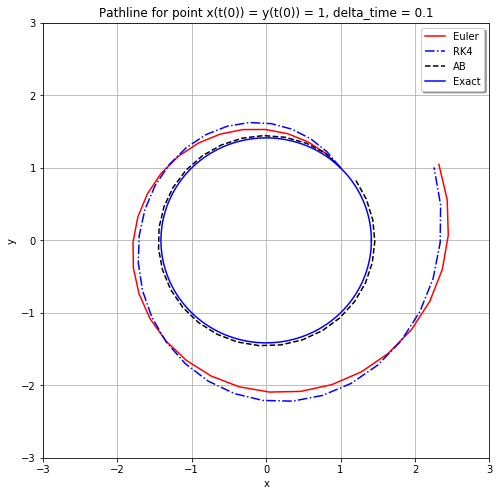

In [16]:
plt.figure(num=4, figsize=(8, 8))
plt.title('Pathline for point x(t(0)) = y(t(0)) = 1, delta_time = ' + str(round(delta_time, 3)))
# Euler
plt.plot(euler_coord_x, euler_coord_y,'-r', label='Euler')
# RK4
plt.plot(rk4_coord_x, rk4_coord_y,'-.b', label='RK4')
# AB
plt.plot(ab_coord_x, ab_coord_y,'--k', label='AB')
# exact analytic
plt.plot(exact_coord_x, exact_coord_y,'-b', label='Exact')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([grid_spacing_start-1, grid_spacing_end+1])
plt.ylim([grid_spacing_start-1, grid_spacing_end+1])

plt.legend(loc='upper right', shadow=True)
plt.grid(True)

Let's zoom to point [1,1] 

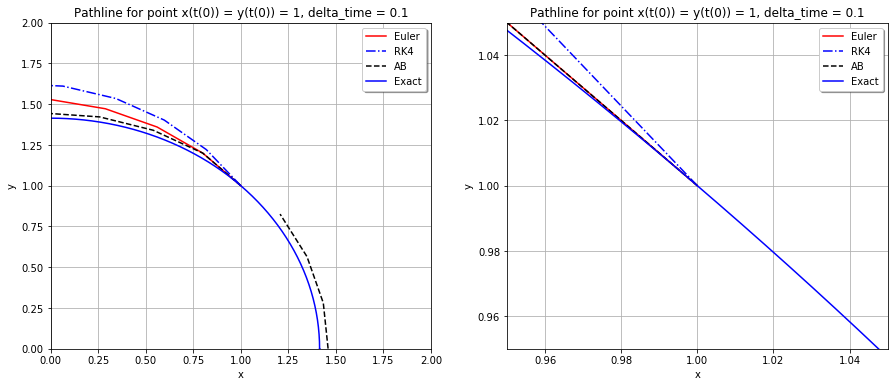

In [17]:
plt.figure(num=5, figsize=(15, 6))

plt.subplot(1,2,1)
plt.title('Pathline for point x(t(0)) = y(t(0)) = 1, delta_time = ' + str(round(delta_time, 3)))
# Euler
plt.plot(euler_coord_x, euler_coord_y,'-r', label='Euler')
# RK4
plt.plot(rk4_coord_x, rk4_coord_y,'-.b', label='RK4')
# AB
plt.plot(ab_coord_x, ab_coord_y,'--k', label='AB')
# exact analytic
plt.plot(exact_coord_x, exact_coord_y,'-b', label='Exact')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.legend(loc='upper right', shadow=True)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Pathline for point x(t(0)) = y(t(0)) = 1, delta_time = ' + str(round(delta_time, 3)))
# Euler
plt.plot(euler_coord_x, euler_coord_y,'-r', label='Euler')
# RK4
plt.plot(rk4_coord_x, rk4_coord_y,'-.b', label='RK4')
# AB
plt.plot(ab_coord_x, ab_coord_y,'--k', label='AB')
# exact analytic
plt.plot(exact_coord_x, exact_coord_y,'-b', label='Exact')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0.95, 1.05])
plt.ylim([0.95, 1.05])
plt.legend(loc='upper right', shadow=True)
plt.grid(True)

plt.show()

Let's compare the pathline length for different integration schemes 

In [18]:
print('Pathline length comparison for dt = ', str(round(delta_time,3)))
print('Euler: ', str(round(euler_pathline_length, 3)))
print('RK4: ', str(round(rk4_pathline_length, 3)))
print('AB: ', str(round(ab_pathline_length, 3)))
print('Exact: ', str(round(exact_pathline_length, 3)))

Pathline length comparison for dt =  0.1
Euler:  11.439
RK4:  11.523
AB:  8.842
Exact:  8.886


## Check Point 2: Discussion

#### What do you observe with different integration schemes? Discuss in groups. 

### Exercise 2: Effect of time step

Reduce the time step to *delta_time* to 0.01. Observe the differences and comment. Modify to 0.001.

### Exercise 3: Modify the velocity field

Redefine the velocity field as u = [1 x 0] and observe differences.

## Check Point 3: Discussion

#### Discuss in groups results and impressions of exercise 2-3. 

### Assignment: Modify the velocity field to time varying one & Streaklines

1. Redefine the velocity field as u = [-2yt 2xt 0] and observe differences.You should have an updating vector plot with time, also the streamlines will be time-dependent. For each time instance there will be new streamlines for the whole field. 
2. For the initial velocity field u = [-2y 2x 0] implement on your own the functionality for calculating streaklines.This is the family of pathlines defined before (connecting all the particles i which are released into the field at position x(t=i)=1 and y(t=i)=1) for a succsession of initial times ti0.